In [100]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [158]:
import pandas as pd
patient = '100'
conditions = ['N','L','R','V','/','A','f','F']

def store_function(patient):
    
    annotations_file = "mit_data/"+patient+"annotations.txt"
    with open(annotations_file, 'r') as file:
        lines = file.readlines()
    csv_file = "mit_data/"+str(patient)+".csv"
    datafile = pd.read_csv(csv_file)

    time_list = []
    sample_list = []
    type_list = []
    feature_list = []
    for line in lines[12:-11]:
        row = line.strip().split()
        if(row[2] in conditions):
            time_list.append(row[0])
            sample_list.append(int(row[1]))
            type_list.append(row[2])
            storage_list = []
            for i in range(int(row[1])-10,int(row[1])+11):
                try: 
                    storage_list.append(datafile.iloc[i]["'MLII'"])
                except KeyError:
                    storage_list.append(datafile.iloc[i]["'V5'"])
            feature_list.append(storage_list)

    return time_list, sample_list, type_list, feature_list, datafile

time_list, sample_list, type_list, feature_list, datafile = store_function(patient)

#feature_list.append(datafile.iloc[int(row[1])-10:int(row[1])+10]["'MLII'"])

In [159]:
print(datafile)
datafile.iloc[0:5]["'MLII'"]


        'sample #'  'MLII'  'V5'
0                0     995  1011
1                1     995  1011
2                2     995  1011
3                3     995  1011
4                4     995  1011
...            ...     ...   ...
649995      649995    1009   928
649996      649996     935   942
649997      649997     889   951
649998      649998     871   957
649999      649999     768  1024

[650000 rows x 3 columns]


0    995
1    995
2    995
3    995
4    995
Name: 'MLII', dtype: int64

In [160]:
#access the patients
import os

onlyfiles = [file for file in os.listdir('mit_data') if os.path.isfile(os.path.join('mit_data', file))]
unique_ids = sorted(set(file[:3] for file in onlyfiles if len(file) > 3))
unique_ids.pop(0)  # Remove the first element, assuming it's not needed

print(unique_ids)
time_list, sample_list, type_list, feature_list, datafile = store_function(unique_ids[0])  




['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


100
101
102
103
104
105
106
107
108
109
111
112
113
114
115
116
117
118
119
121
122
123
124
200
201
202
203
205
207
208
209
210
212
213
214
215
217
219
220
221
222
223
228
230
231
232
233
234


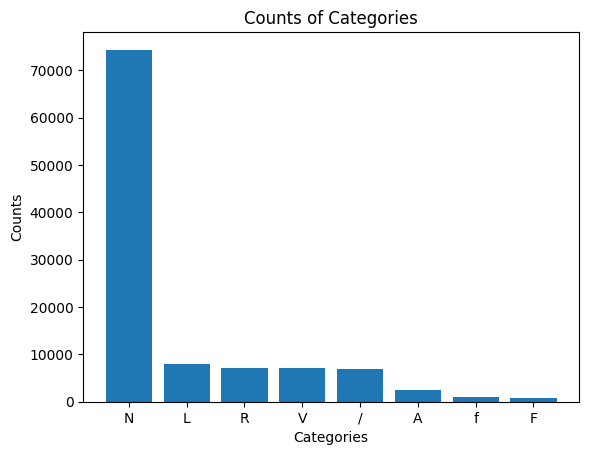

In [162]:
import matplotlib.pyplot as plt
labels_map = {
    0: "N",
    1: "L",
    2: "R",
    3: "V",
    4: "/",
    5: "A",
    6: "f",
    7: "F"
}

count_map = {
    "N":0,
    "L":0,
    "R":0,
    "V":0,
    "/":0,
    "A":0,
    "f":0,
    "F":0
}

type_list_all = []
feature_list_all = []
for i in unique_ids:
    print(i)
    time_list, sample_list, type_list, feature_list, datafile = store_function(i)  
    type_list_all.append(type_list)
    feature_list_all.append(feature_list)
    for j in type_list:
        count_map[j] +=1

plt.bar(count_map.keys(), count_map.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Categories')
plt.show()


In [157]:
print(len(feature_list))

56322


In [189]:
import pandas as pd
import numpy as np
import torch



# Convert signals to numerical arrays
feature_list = np.array(feature_list)

# Normalize signals (optional)
mean = feature_list.mean(axis=0)
std = feature_list.std(axis=0)
signals = (feature_list - mean) / std

# Convert signals and labels to PyTorch tensors
signals_tensor = torch.tensor(signals, dtype=torch.float32)
labels_tensor = torch.tensor(feature_list, dtype=torch.long)

# Print shapes to verify
print("Signals Tensor Shape:", signals_tensor.shape)
print("Labels Tensor Shape:", labels_tensor.shape)


Signals Tensor Shape: torch.Size([2682, 21])
Labels Tensor Shape: torch.Size([2682, 21])


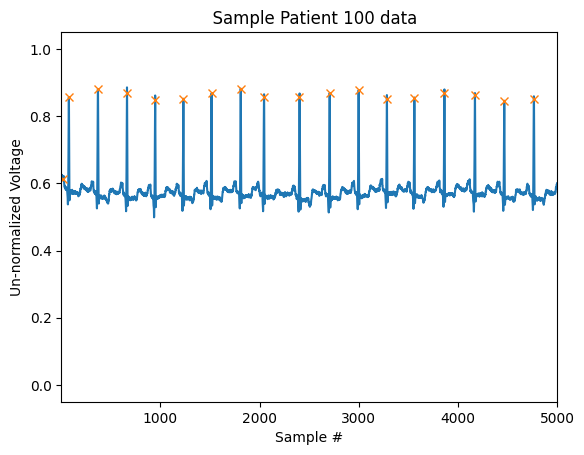

In [190]:
import random
def z_norm(result):  
    result = (result-min(result))/(max(result)-min(result))
    return result
def get_patient_data(patient,norm=True, sample_plot=False):
    widths= [4,8,11,6,3,5,5,8]
    
    patient=str(patient)
    ecg_notes= pd.read_fwf('mit_data/{}annotations.txt'.format(patient),widths=widths).drop(['Unnamed: 0'],axis=1)
    ecg_data= pd.read_csv('mit_data/{}.csv'.format(patient))
    ecg_data.columns= ['samp_num','signal','V']
    ecg_notes=ecg_notes[['Sample #','Type','Aux']]
    ecg_notes.columns=['sample_num','type','aux']
    ecg_data.signal= z_norm(ecg_data.signal)
    if sample_plot == True:
        peaklist= ecg_notes.sample_num.astype(int).values
        plt.figure()
        b=random.choice(ecg_data.signal)
        plt.plot(ecg_data.signal)
        plt.xlim(b,b+5000)
        plt.plot(peaklist, ecg_data.signal[peaklist], "x")
        plt.title('  Sample Patient {} data'.format(patient))
        return None
        
    return ecg_data.signal,ecg_notes


get_patient_data(patient,norm=True,sample_plot=True)
plt.ylabel('Un-normalized Voltage')
plt.xlabel('Sample #')
plt.draw()

In [191]:
import os
import pandas as pd

class CustomArrhythmiaDataset(Dataset):
    def __init__(self, feature_list_all, type_list_all ):
        self.feature_list_all = feature_list_all
        self.type_list_all = type_list_all

    def __len__(self):
        return len(self.type_list_all)

    def __getitem__(self, idx):
        feature = self.feature_list_all[idx]
        label = self.type_list_all[idx]
        return feature, label

In [197]:
from torch.utils.data import DataLoader
import random

# Define the sizes of the training, validation, and testing sets
train_size = 0.7  # 70% for training
val_size = 0.1    # 10% for validation
test_size = 0.2   # 20% for testing

# Shuffle the data to ensure randomness
random.shuffle(feature_list)

# Calculate the split indices
train_split = int(len(feature_list) * train_size)
val_split = train_split + int(len(feature_list) * val_size)

# Split the data into training, validation, and testing sets
train_data = feature_list[:train_split]
val_data = feature_list[train_split:val_split]
test_data = feature_list[val_split:]

# Print the lengths of the datasets to verify the splits
print("Length of Training Data:", len(train_data))
print("Length of Validation Data:", len(val_data))
print("Length of Testing Data:", len(test_data))

train_dataset = CustomArrhythmiaDataset(train_data, type_list_all)
val_dataset = CustomArrhythmiaDataset(val_data, type_list_all)
test_dataset = CustomArrhythmiaDataset(test_data, type_list_all)

# Define batch size
batch_size = 64  # Adjust according to your requirements

# Create DataLoader instances for training, validation, and testing datasets
def collate_fn(batch):
       # Sort batch by sequence length
    batch.sort(key=lambda x: len(x[0]), reverse=True)
    sequences, labels = zip(*batch)
    # Pad sequences to the length of the longest sequence in the batch
    padded_sequences = nn.utils.rnn.pad_sequence([torch.tensor(seq) for seq in sequences], batch_first=True)
    return padded_sequences, torch.tensor(labels)
# Use the custom collate function with your DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Length of Training Data: 1877
Length of Validation Data: 268
Length of Testing Data: 537


In [198]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [194]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
device = "cpu"
print(f"Using {device} device")

Using cpu device


In [199]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension (batch_size, channels, sequence_length)
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = torch.flatten(x, 1)  # Flatten for fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN model
model = CNN()
print(model)


CNN(
  (conv1): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [196]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 10

# Set the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Iterate over the training dataset
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Print average loss for the epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_dataloader)}")

print("Training complete.")

ValueError: too many dimensions 'str'

In [44]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [45]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [46]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


In [47]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [48]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [49]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [50]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0422,  0.2567, -0.1300, -0.0378, -0.3387,  0.7895, -0.3363, -0.1421,
          0.0900, -0.3998, -0.1397,  0.2506,  0.3262,  0.0659,  0.2221,  0.4679,
          0.6152,  0.1948, -0.0775, -0.4492],
        [ 0.0237,  0.5144,  0.1802,  0.3457, -0.0461,  0.2749, -0.6718, -0.0594,
         -0.2098, -0.4099,  0.0202,  0.8654,  0.0576, -0.2113, -0.0354,  0.2176,
          0.6417,  0.1802, -0.4189, -0.1212],
        [ 0.0609,  0.4032,  0.0241,  0.4026, -0.3077, -0.0228, -0.5026, -0.2554,
          0.0578, -0.7925, -0.1568,  0.4622,  0.3561, -0.0174, -0.3077,  0.0465,
          0.7655,  0.0937, -0.3742, -0.2461]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.2567, 0.0000, 0.0000, 0.0000, 0.7895, 0.0000, 0.0000, 0.0900,
         0.0000, 0.0000, 0.2506, 0.3262, 0.0659, 0.2221, 0.4679, 0.6152, 0.1948,
         0.0000, 0.0000],
        [0.0237, 0.5144, 0.1802, 0.3457, 0.0000, 0.2749, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0202, 0.8654, 0.0576, 0.0000, 0.00

In [51]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [52]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [53]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 3.0590e-03,  3.5689e-02, -2.1531e-02,  ...,  8.5570e-06,
         -1.6996e-02,  2.7888e-02],
        [ 1.5005e-02,  9.7680e-03,  2.7496e-02,  ..., -1.3444e-02,
          2.2008e-03,  7.4503e-04]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0217, 0.0035], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0079,  0.0064, -0.0340,  ..., -0.0083, -0.0020,  0.0089],
        [-0.0171,  0.0090, -0.0371,  ...,  0.0333,  0.0338,  0.0043]],
       grad_

In [54]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [55]:

loss_fn = nn.CrossEntropyLoss()

In [56]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [59]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)


        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306395  [   64/60000]
loss: 2.289224  [ 6464/60000]
loss: 2.282892  [12864/60000]
loss: 2.251267  [19264/60000]
loss: 2.284372  [25664/60000]
loss: 2.235191  [32064/60000]
loss: 2.220590  [38464/60000]
loss: 2.192304  [44864/60000]
loss: 2.171156  [51264/60000]
loss: 2.183296  [57664/60000]
Test Error: 
 Accuracy: 47.7%, Avg loss: 2.168401 

Epoch 2
-------------------------------
loss: 2.186865  [   64/60000]
loss: 2.127919  [ 6464/60000]
loss: 2.156564  [12864/60000]
loss: 2.114685  [19264/60000]
loss: 2.055160  [25664/60000]
loss: 2.079516  [32064/60000]
loss: 2.012615  [38464/60000]
loss: 1.977399  [44864/60000]
loss: 1.954687  [51264/60000]
loss: 1.949767  [57664/60000]
Test Error: 
 Accuracy: 59.4%, Avg loss: 1.926234 

Epoch 3
-------------------------------
loss: 1.905416  [   64/60000]
loss: 1.943895  [ 6464/60000]
loss: 1.859536  [12864/60000]
loss: 1.839421  [19264/60000]
loss: 1.859195  [25664/60000]
loss: 1.716004  [32064/600

In [62]:
import torchvision.models as models

In [63]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/prishamarpu/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%


In [64]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [65]:
torch.save(model, 'model.pth')
model = torch.load('model.pth')